# 로지스틱 회귀 분석

로지스틱 회귀(Logistic Regression) 분석은 회귀 분석이라는 명칭을 가지고 있지만 분류(classsification) 방법의 일종이다.

로지스틱 회귀 모형에서는 베르누이 확률 변수(Bernoilli random variable)의 모수(parameter) $\theta$가 독립 변수 $x$에 의존한다고 가정한다.
 * 과거에는 로지스틱 함수를 쓰는 이유가 계산하는데 부담이 없어서 컴퓨팅 사양이 낮아도 가능했으나 요즘에는 컴퓨터 사양이 좋아졌기 때문에 큰 메리트가 없다.

$$ p(y \mid x, \theta) = \text{Ber} (y \mid  \theta(x) )$$


여기에서 모수 $\theta$ 는 0과 1사이의 실수이며 다음과 같이 $x$의 값에 의존하는 함수이다.

$$
\theta = f(w^Tx)
$$


## 시그모이드 함수

모수 $\theta$는 일반적인 회귀 분석의 종속 변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드 함수(sigmoid function)이라 불리는 특별한 형태의 함수 $f$를 사용해야 한다.

시그모이드 함수는 종속 변수의 모든 실수 값에 대해 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 양의 기울기를 가지는 함수를 말하며 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱 함수 (Logistic Function) 
 
$$ \text{logitstic}(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 오차 함수 (Error Function) 
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 
 * 하이퍼볼릭 탄젠트 함수 (Hyperbolic tangent) 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} $$
 
 * 역 탄젠트 함수 (Arc-tangent) 
 
$$ \arctan(z) = \tan^{-1}(z) $$


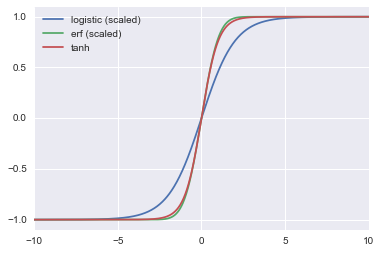

In [1]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, (1/(1+np.exp(-xx)))*2-1, label="logistic (scaled)")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), label="erf (scaled)")
plt.plot(xx, np.tanh(xx), label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.show()

## 로지스틱 함수

여러가지 시그모이드 중 로지스틱 함수는 다음과 같은 물리적인 의미를 부여할 수 있기 때문에 많이 사용된다.

우선 Bernoulli 시도에서 1이 나올 확률 $\theta$ 와 0이 나올 확률 $1-\theta$ 의 비(ratio)는 다음과 같은 수식이 되며 odds ratio 라고 한다.

$$ \text{odds ratio} = \dfrac{\theta}{1-\theta} $$

이 odds ratio 를 로그 변환한 것이 로지트 함수(Logit function)이다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right) $$ 

로지스틱 함수(Logistic function) 는 이 로지트 함수의 역함수이다.

$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

## 로지스틱 모형의 모수 추정

로지스틱 모형은 일종의 비선형 회귀 모형이지만 다음과 같이 MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다.

여기에서는 종속 변수 $y$가 베르누이 확률 변수라고 가정한다.

$$ p(y \mid x, \theta) = \text{Ber} (y \mid  \theta(x) )$$

데이터 표본이 $\{ x_i, y_i \}$일 경우 Log Likelihood $\text{LL}$ 를 구하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i)^{y_i} (1-\theta_i(x_i))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i) +  (1-y_i)\log(1-\theta_i(x_i)) \right) \\
\end{eqnarray}
$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\log \left(\dfrac{\theta(x)}{1-\theta(x)}\right) = w^T x
$$



$$
\theta(x) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

가 되고 이를  Log Likelihood 에 적용하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i) +  (1-y_i)\log(1-\theta_i(x_i)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) - (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$



이 값의 최대화하는 값을 구하기 위해 chain rule를 사용하여 $w$로 미분해야 한다.

우선 $\theta$를 $w$로 미분하면

$$ \dfrac{\partial \theta}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx)}} \ 
= \dfrac{\exp{(-w^Tx)}}{(1 + \exp{(-w^Tx)})^2} x \ 
= \theta(1-\theta) x $$


chain rule를 적용하면 

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \dfrac{\partial \theta}{\partial w}  \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

이 값은 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수 $w$의 값을 구해야 한다.

## 수치적 최적화

단순한 Steepest Gradient 방법을 사용한다면 최적화 알고리즘은 다음과 같다.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이 방향으로 step size $\eta_k$ 만큼 움직이면 다음과 같이 반복적으로 최적 모수값을 구할 수 있다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i) \big) x_i\\
\end{eqnarray}
$$


공식에서 y랑 x와 세타의 곱이랑 뺀 것은 오차

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

In [1]:
from sklearn.datasets import make_classification
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)
#redundant는 informative한 것이 몇개가 있는가? 더 자세한 것은 classfication 메뉴얼을 보면 된다.

In [2]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression().fit(X0, y)   #model을 만들 때 상수항이 끼면 안 된다? 왜 그렇지?

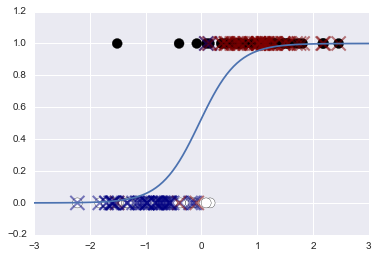

In [10]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1+np.exp(-model.coef_[0][0]*xx-model.intercept_[0]))   #여기 model들어가는데 대체 왜 상수항?? ㅠㅠ
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## statsmodels 패키지의 로지스틱 회귀

statsmodels 패키지는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 와 동일하다. Scikit-Learn 패키지와 달리 `Logit` 클래스는 classification 되기 전의 값을 출력한다

In [11]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)  #(disp=0) 그레디언트로 몇 번 리터레이션해서 찾아가는 과정 때문에 쓰는 값
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Sep 2016   Pseudo R-squ.:                  0.7679
Time:                        08:11:09   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598        -0.683     1.186
x1             4.2382      0.902      4.699      0.000         2.470     6.006


* converged:   True
 * 이게 True여야 전체가 의미가 있는 것. 만약 트루가 아니면 컨버진을 시켜야 한다. 

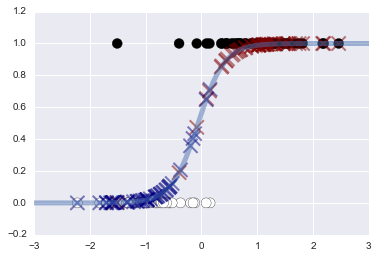

In [12]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 예제 1: Michelin and Zagat 가이드 비교

다음 데이터는 뉴욕시의 레스토랑에 대한 두 개의 가이드북에서 발취한 것이다.

* Food: Zagat Survey 2006 의 고객 평가 점수
* InMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 수
* NotInMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실리지 않은 레스토랑의 수
* mi: 해당 고객 평가 점수를 받은 레스토랑의 수
* proportion: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 비율

In [14]:
df = pd.read_table("MichelinFood.txt")
df

,Food,InMichelin,NotInMichelin,mi,proportion
0,15,0,1,1,0.00
1,16,0,1,1,0.00
2,17,0,8,8,0.00
3,18,2,13,15,0.13
4,19,5,13,18,0.28
5,20,8,25,33,0.24
6,21,15,11,26,0.58
7,22,4,8,12,0.33
8,23,12,6,18,0.67
9,24,6,1,7,0.86


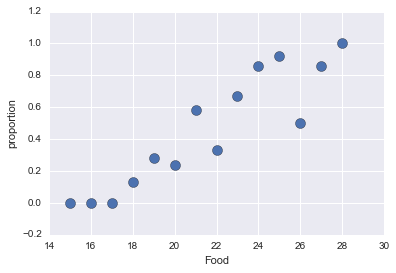

In [15]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [16]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.355086
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Sep 2016   Pseudo R-squ.:                  0.4832
Time:                        08:53:59   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047       -20.574    -0.146
Food           0.4671      0.

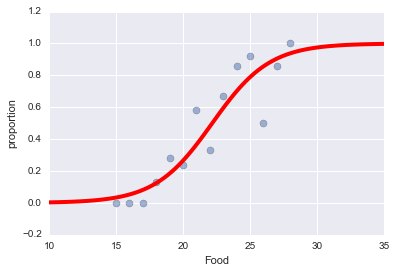

In [17]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()

## 예제 2: Michelin 가이드 예측

다음 데이터는 뉴욕시의 개별 레스토랑의 고객 평가 점수와 Michelin 가이드 수록 여부를 보인 것이다.


* InMichelin: Michelin 가이드 수록 여부
* Restaurant Name: 레스토랑 이름
* Food: 식사에 대한 고객 평가 점수 (1~30)
* Decor: 인테리어에 대한 고객 평가 점수 (1~30)
* Service: 서비스에 대한 고객 평가 점수 (1~30)
* Price: 저녁 식사 가격 (US$)


In [18]:
import sys
print(sys.getdefaultencoding())
print(sys.stdin.encoding)
print(sys.stdout.encoding)
import locale
print(locale.getpreferredencoding())

utf-8
cp949
UTF-8
cp949


In [19]:
df = pd.read_csv("MichelinNY.csv", encoding = "ISO-8859-1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


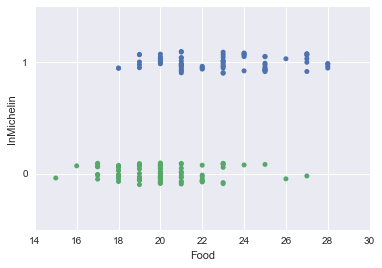

In [20]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [21]:
X = sm.add_constant(df.Food)
y = df.InMichelin
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.535763
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      162
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Sep 2016   Pseudo R-squ.:                  0.2217
Time:                        09:11:00   Log-Likelihood:                -87.865
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 1.492e-12
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.8415      1.862     -5.821      0.000       -14.492    -7.191
Food           0.5012      0.

21.8686868687


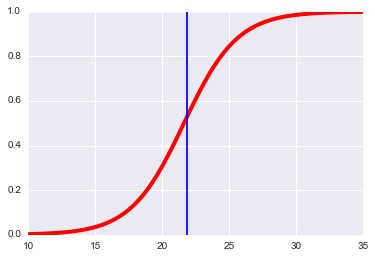

In [22]:
xx = np.linspace(10, 35, 100)
pred = result.predict(sm.add_constant(xx))
decision_value = xx[np.argmax(pred > 0.5)]
print(decision_value)
plt.plot(xx, pred, "r", lw=4)
plt.axvline(decision_value)
plt.xlim(10, 35)
plt.show()

## 예제 3: Fair's Affair Dataset

In [23]:
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
    Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming,

In [24]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


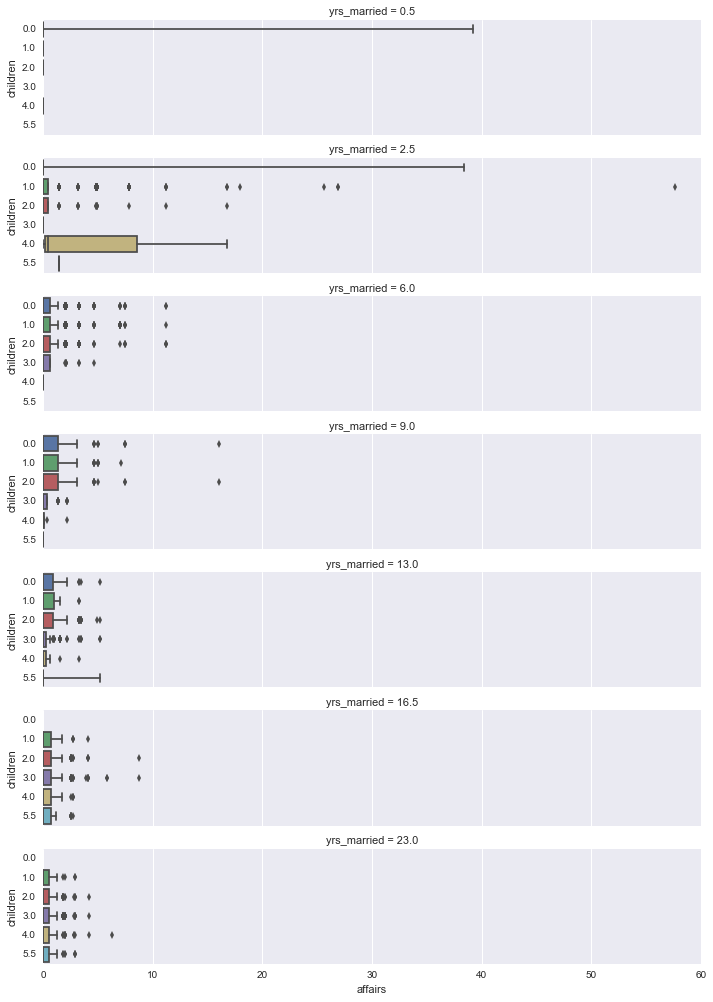

In [25]:
sns.factorplot(x="affairs", y="children", row="yrs_married", data=df,
               orient="h", size=2, aspect=5, kind='box')
plt.show()

In [26]:
df['affair'] = (df['affairs'] > 0).astype(float)
model = sm.formula.logit("affair ~ rate_marriage + religious + yrs_married + age + educ + children", df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.547174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 Sep 2016   Pseudo R-squ.:                  0.1297
Time:                        09:17:25   Log-Likelihood:                -3483.3
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                4.345e-221
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         3.8350      0.296     12.940      0.000         3.254     4.416
rate_marriage    -0.

anova로 볼 수 없다. 비선형이기 때문에. 관계가 없기 때문에 